# F05
- **데이터 시각화**
  - **요구사항명** : 일별 최고/최저/종가 시각화
  - **요구사항 명세** : 2022년 이후 데이터를 바탕으로 3가지
지표를 하나의 그래프에 시각화

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
def file_open_by_numpy():
    np_arr = np.loadtxt('NFLX.CSV', delimiter=",", encoding='cp949', dtype=str) # 텍스트 파일을 읽어와 Numpy 배열로 변환
    return np_arr

df = pd.read_csv('NFLX.csv', encoding = 'cp949', usecols = ['Date', 'Open', 'High', 'Low', 'Close'], parse_dates=['Date'])

In [ ]:
# 2022-01-01 이후만
df = df[df['Date'] >= '2022-01-01']

In [ ]:
# 인덱스를 컬럼으로 복구
df = df.reset_index(drop=True)

In [17]:
# 일별 그룹화
daily = (
    df
    .groupby(df['Date'].dt.date)
    .agg({'High':'max','Low':'min','Close':'last'})
    .reset_index()
)
daily.columns = ['Date','High','Low','Close']
daily['Date'] = pd.to_datetime(daily['Date']) 

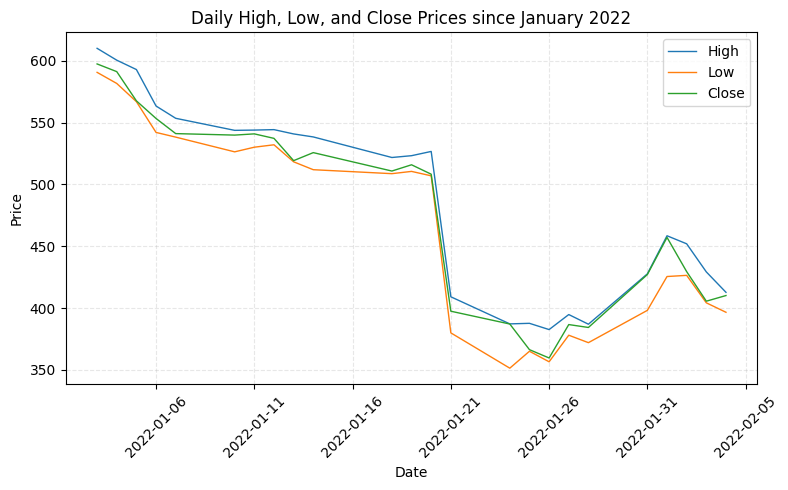

In [ ]:
# 시각화
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(daily['Date'], daily['High'],  label='High',  linewidth=1)
ax.plot(daily['Date'], daily['Low'],   label='Low',   linewidth=1)
ax.plot(daily['Date'], daily['Close'], label='Close', linewidth=1)

ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

ax.set_title('Daily High, Low, and Close Prices since January 2022')
ax.set_xlabel('Date')
ax.set_ylabel('Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()
plt.show()